In [1]:
# Data Analysis
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [2]:
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC;
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Importing Data
train=pd.read_csv('~/.kaggle/competitions/titanic/train.csv')
test=pd.read_csv('~/.kaggle/competitions/titanic/test.csv')

In [4]:
Id=test['PassengerId']

In [5]:
data=[train,test]

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Analyzing the data

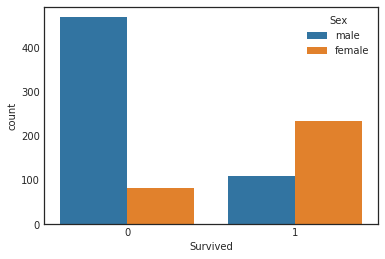

In [10]:
sns.countplot(x='Survived',data=train,hue='Sex')

In [11]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


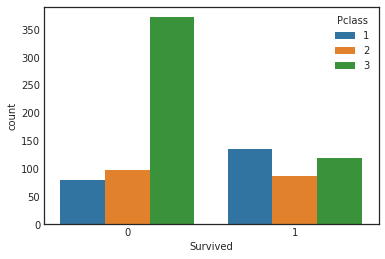

In [12]:
sns.countplot(x='Survived',data=train,hue='Pclass')

In [13]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Conclusion
1. Passengers from Upper Class had a better survival rate
2. Female passengers had a better survival rate than Mens

### Analysis by Age

/home/pulkit47/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


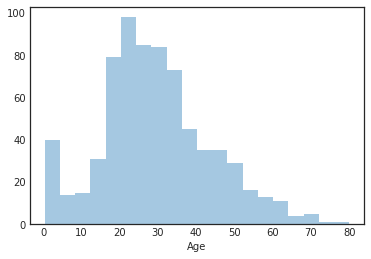

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,bins=20)

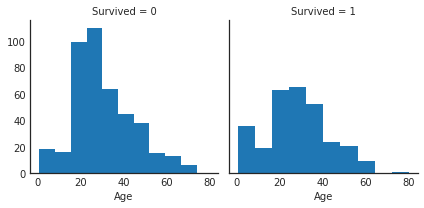

In [15]:
grid=sns.FacetGrid(train,col='Survived')
grid.map(plt.hist,'Age')

Conclusion
1. Infants have a better survival rate

### Analysis by 'Fare'

/home/pulkit47/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


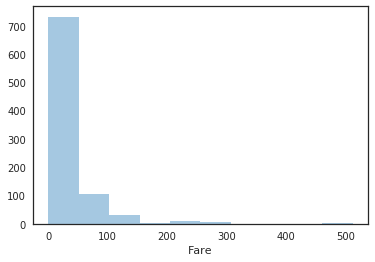

In [16]:
sns.set_context('notebook')
sns.distplot(train['Fare'],kde=False,bins=10)

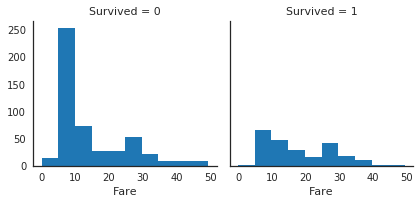

In [17]:
sns.set_context('notebook')
poor=train[train['Fare']<50]
grid2=sns.FacetGrid(poor,col='Survived')
grid2.map(plt.hist,'Fare')

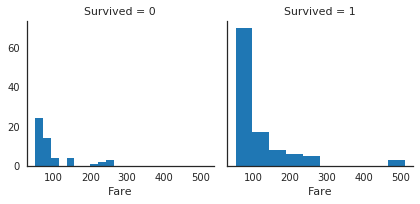

In [18]:
sns.set_context('notebook')
rich=train[train['Fare']>=50]
grid1=sns.FacetGrid(rich,col='Survived')
grid1.map(plt.hist,'Fare')

Conclusion
1. People who paid more Fare had a better survival rate

### Creating New Features

We will be creating a new feature called **TITLE** extracted from the column **NAME**

In [19]:
for df in data:
    df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [20]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

We will be having these four TITLES

* Mr
* Mrs
* Master
* Miss

We will change all the remaining titles

In [22]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [24]:
for df in data:
    df['Title'] = df['Title'].replace(['Capt','Col','Don','Jonkheer','Major','Rev','Sir'],'Mr')
    df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme','Lady','Countess','Dona'], 'Mrs')

In [25]:
for df in data:
    df.loc[ (df['Sex']=='male' ) & (df['Title']=='Dr') , 'Title' ]='Mr'
    df.loc[ (df['Sex']=='female' ) & (df['Title']=='Dr') , 'Title' ]='Mrs'

In [26]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,537
Mrs,129,0


In [27]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,245
Mrs,73,0


### Dealing With Missing Values

In [28]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Title          891
dtype: int64

In [29]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
Title          418
dtype: int64

So we have our missing values in the columns *Age*, *Cabin* and *Embarked*

To deal with missing value in the *Age* column we will replace the missing values with the **MEAN** values grouped by their *Title*

In [30]:
train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.845638
Mr        32.984412
Mrs       35.991071
Name: Age, dtype: float64

In [31]:
for df in data:
    df.loc[  (df['Title']=='Mr'     ) &  (df['Age'].isnull()) , 'Age'] = 33
    df.loc[  (df['Title']=='Mrs'    ) &  (df['Age'].isnull()) , 'Age'] = 36
    df.loc[  (df['Title']=='Master' ) &  (df['Age'].isnull()) , 'Age'] = 5
    df.loc[  (df['Title']=='Miss'   ) &  (df['Age'].isnull()) , 'Age'] = 22

Since we have a lot of missing values in the *Cabin* feature it is okay to drop it

In [32]:
for df in data:
    df.drop('Cabin',axis=1,inplace=True)

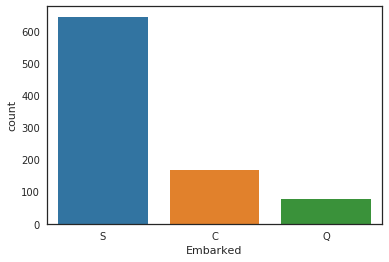

In [33]:
sns.countplot(x='Embarked',data=train)

Since the frequency of S is much greater than the other two , we can assign S to the null values

In [34]:
train.loc[train['Embarked'].isnull(), 'Embarked']='S'

In [35]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [36]:
test['Fare'].mean()

35.6271884892086

In [37]:
test.loc[test['Fare'].isnull() , 'Fare']= test['Fare'].mean()

### Converting categorical features to integer values

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [39]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()

for df in data:
    df['Sex']=number.fit_transform(df['Sex'].astype('str'))
    df['Embarked']=number.fit_transform(df['Embarked'].astype('str'))
    df['Title']=number.fit_transform(df['Title'].astype('str'))

In [40]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
Title            int64
dtype: object

### Deleting Features

* Since the features PassengerId and Ticket do not contribute to passenger's survival rate we will drop these features
* The feature Name has been used to create a new feature called Title as now is of no use
* We will also delete the features SibSp and Parch

In [41]:
for df in data:
    df.drop(['PassengerId','Ticket','Name','SibSp','Parch'],axis=1,inplace=True)

# Machine Learing

In [42]:
X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']
X_test=test

In [43]:
# Logistic Regression
logReg=LogisticRegression()
logReg.fit(X_train,Y_train)
Y_predict_log=logReg.predict(X_test)
acc_log = round(logReg.score(X_train, Y_train) * 100, 2)
acc_log

79.57

In [44]:
# Support Veector Machine
svc= SVC()
svc.fit(X_train,Y_train)
Y_predict_svc =svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

91.13

In [45]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predict_random_forest = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.98

### Model Evaluation

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Random Forest'],
    'Score': [acc_log, acc_svc, acc_random_forest]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,97.98
1,Support Vector Machines,91.13
0,Logistic Regression,79.57


### Generating Output File

In [47]:
# Submission file for Random Forest
submission_random_forest = pd.DataFrame({
        "PassengerId": Id,
        "Survived": Y_predict_random_forest
    })

submission_random_forest.to_csv('submission_random_forest.csv',index=False)

In [48]:
# Submission file for Logistic Regression
submission_log = pd.DataFrame({
        "PassengerId": Id,
        "Survived": Y_predict_log
    })

submission_log.to_csv('submission_log.csv',index=False)

In [49]:
# Submission file for Support Vector Machine
submission_svc = pd.DataFrame({
        "PassengerId": Id,
        "Survived": Y_predict_svc
    })

submission_svc.to_csv('submission_svc.csv',index=False)